# Pipelines: Metaflow Basics

https://docs.metaflow.org/metaflow/basics

## Install dependencies

In [1]:
# Dependencies
!pip install -r requirements.txt

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 13.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.4 MB ? eta -:--:--
   ---------- ----------------------------- 3.4/13.4 MB 15.4 MB/s eta 0:00:01
   --------------- ------------------------ 5.2/13.4 MB 13.3 MB/s eta 0:00:01
   ------------------------- -------------- 8.7/13.4 MB 14.1 MB/s eta 0:00:01
   ------------------------------------ --- 12.3/13.4 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 13.4/13.4 MB 14.5 MB/s eta 0:00:00


## Set username for Metaflow

In [2]:
# Set username for workflows
import os
os.environ["USERNAME"] = "daniel"

# Linear flow

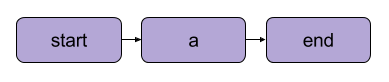

In [3]:
%%writefile metaflow_basics_linearflow.py
from metaflow import FlowSpec, step

class LinearFlow(FlowSpec):

    @step
    def start(self):
        self.my_var = 'hello world'
        self.next(self.a)

    @step
    def a(self):
        print('the data artifact is: %s' % self.my_var)
        self.next(self.end)

    @step
    def end(self):
        print('the data artifact is still: %s' % self.my_var)

if __name__ == '__main__':
    LinearFlow()

Writing metaflow_basics_linearflow.py


In [6]:
!python metaflow_basics_linearflow.py run

Traceback (most recent call last):
  File "c:\Users\Usuario\Documents\Master IA\MIA 24-25\EDEM_MDA2425\venv\Lib\site-packages\metaflow\metaflow_version.py", line 30, in find_git_on_windows
    check_output(["where", "/Q", "git"])
    ^^^^^^^^^^^^
NameError: name 'check_output' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Usuario\Documents\Master IA\MIA 24-25\EDEM_MDA2425\PROFESORES\MIA\MLOPS\pipelines\metaflow_basics_linearflow.py", line 1, in <module>
    from metaflow import FlowSpec, step
  File "c:\Users\Usuario\Documents\Master IA\MIA 24-25\EDEM_MDA2425\venv\Lib\site-packages\metaflow\__init__.py", line 114, in <module>
    from .plugins.datatools import S3
  File "c:\Users\Usuario\Documents\Master IA\MIA 24-25\EDEM_MDA2425\venv\Lib\site-packages\metaflow\plugins\__init__.py", line 189, in <module>
    STEP_DECORATORS = resolve_plugins("step_decorator")
                      ^^^^^^^^^^^^^^^

# Branches
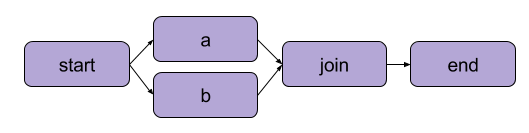

In [5]:
%%writefile metaflow_basics_branchflow.py
from metaflow import FlowSpec, step

class BranchFlow(FlowSpec):

    @step
    def start(self):
        self.next(self.a, self.b)

    @step
    def a(self):
        self.x = 1
        self.next(self.join)

    @step
    def b(self):
        self.x = 2
        self.next(self.join)

    @step
    def join(self, inputs):
        print('a is %s' % inputs.a.x)
        print('b is %s' % inputs.b.x)
        print('total is %d' % sum(input.x for input in inputs))
        self.next(self.end)

    @step
    def end(self):
        pass

if __name__ == '__main__':
    BranchFlow()

Writing metaflow_basics_branchflow.py


In [ ]:
!python metaflow_basics_branchflow.py run

# Foreach
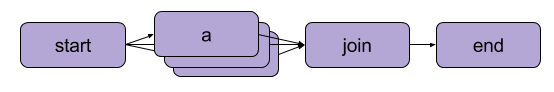

In [ ]:
%%writefile metaflow_basics_foreachflow.py
from metaflow import FlowSpec, step

class ForeachFlow(FlowSpec):

    @step
    def start(self):
        self.titles = ['Stranger Things',
                       'House of Cards',
                       'Narcos']
        self.next(self.a, foreach='titles')

    @step
    def a(self):
        self.title = '%s processed' % self.input
        self.next(self.join)

    @step
    def join(self, inputs):
        self.results = [input.title for input in inputs]
        self.next(self.end)

    @step
    def end(self):
        print('\n'.join(self.results))

if __name__ == '__main__':
    ForeachFlow()

In [ ]:
!python metaflow_basics_foreachflow.py run

# Defining parameters

In [ ]:
%%writefile metaflow_basics_parameterflow.py
from metaflow import FlowSpec, Parameter, step

class ParameterFlow(FlowSpec):
    alpha = Parameter('alpha',
                      help='Learning rate',
                      default=0.01)

    @step
    def start(self):
        print('alpha is %f' % self.alpha)
        self.next(self.end)

    @step
    def end(self):
        print('alpha is still %f' % self.alpha)

if __name__ == '__main__':
    ParameterFlow()

In [ ]:
!python metaflow_basics_parameterflow.py run --alpha 0.9